<a href="https://colab.research.google.com/github/wanjas1/Predicting-Customer-Sentiment-for-Clothing-Products-A-Machine-Learning-Approach/blob/main/Predicting_Customer_Sentiment_for_Clothing_Products_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Full Name { run: "auto" }
Name = 'Sharomith Wanja' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: Sharomith Wanja


## Problem Statement:

Customer sentiment plays a crucial role in the retail industry, influencing sales, brand reputation, and customer loyalty. Macy’s, a leading department store, seeks to enhance its understanding of customer opinions by predicting the sentiment of clothing product reviews. With a dataset of 5,000 customer reviews, the goal is to develop and compare multiple classification models to accurately predict sentiment, with a special focus on identifying negative reviews.

By leveraging machine learning techniques, Macy’s aims to proactively detect dissatisfaction, improve product offerings, and enhance customer experiences. Accurately identifying negative sentiment can help the company take timely action—whether through quality improvements, customer service interventions, or strategic marketing adjustments—ensuring continued customer trust and satisfaction.

## Prerequisite Code

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve



---





1. (a) (1) Use the 'clothing_revs.csv' file to create a data frame named reviews. View the first 5 observations in the review data frame.


In [2]:
reviews = pd.read_csv('/content/clothing_revs.csv')
reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


1. (b) (1) View the dataframe information, to evaluate variable types and missingness. If there are any missing values in the Review_Text column, remove the observation(s) from the dataframe row-wise.

In [3]:
reviews = reviews.dropna(subset=['Review Text'])
print("\nMissing values in 'Review Text':")
print(reviews['Review Text'].isnull().sum())

print("\nAfter removing missing values:")
print(reviews.info())


Missing values in 'Review Text':
0

After removing missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 4821 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              4821 non-null   int64 
 1   Age                      4821 non-null   int64 
 2   Title                    4159 non-null   object
 3   Review Text              4821 non-null   object
 4   Rating                   4821 non-null   int64 
 5   Recommended IND          4821 non-null   int64 
 6   Positive Feedback Count  4821 non-null   int64 
 7   Division Name            4821 non-null   object
 8   Department Name          4821 non-null   object
 9   Class Name               4821 non-null   object
dtypes: int64(5), object(5)
memory usage: 414.3+ KB
None


1. (c) (1) The Rating variable takes on values from 1-5. Create a column named sentiment that converts rating values of 1-3 to 0 and 4-5 to 1.

Then, plot the sentiment variable to view the distribution of negative and positive reviews.

Positive-label:  0.7736984028209914


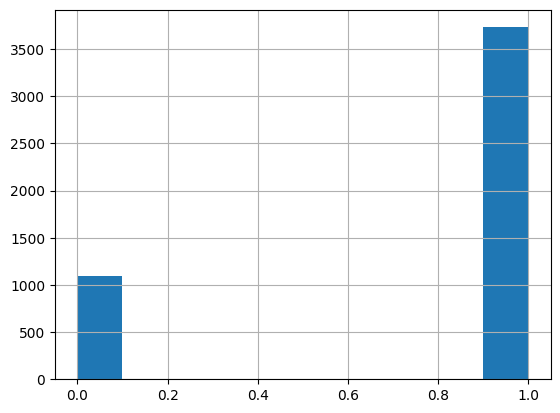

In [4]:
reviews['sentiment'] = reviews['Rating'].replace({1:0, 2:0, 3:0, 4:1, 5:1})

reviews['sentiment'].hist()
print('Positive-label: ', reviews['sentiment'].mean())

<hr>
<br>

2. (2) Create the train and test sets. Split the data using a 75/25 split ratio and initialize a random seed (`random_state`) of 321 for reproducibility.

In [5]:
# Define the features and target variable
X = reviews['Review Text']
y = reviews['sentiment']

# Split the data into train and test sets with a 75/25 ratio and a random seed of 321
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

**Building and Evaluating a Sentiment Classification Pipeline**
3. (a) (5) Develop a classification pipeline to predict sentiment ratings from customer reviews. The analysis will incorporate multiple machine learning models, including Complement Naive Bayes, Logistic Regression, Support Vector Machines, Decision Tree, AdaBoost, Random Forest, and Multilayer Perceptron (MLP/ANN).

The pipeline will follow these key steps for each model:


*   Preprocess and tokenize review text by removing stop words and setting a minimum document frequency of 5 (min_df = 5).
*   Transform text data into a TF-IDF-weighted Document-Term Matrix.

*   Train the classification model using the transformed data.
*   Evaluate model performance by obtaining and printing key performance metrics.









This structured approach ensures a robust comparison of different classification techniques, helping to identify the most effective model for sentiment prediction.

In [6]:
# List of models
names = ["ComplementNB", "Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net"]
classifiers = [
    ComplementNB(),
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)]

# Iterate through models and evaluate
for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # Preprocess and tokenize reviews
        (name, clf),  # Train the classification model
        ])

    clf_pipe.fit(X_train, y_train)  # Train on the training data

    pred = clf_pipe.predict(X_test)  # Make predictions
    pred_prob = clf_pipe.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

    # Print performance information for each model
    print(f'\n{name}\n')
    print(classification_report(y_test, pred))
    print('ROC AUC: ', auc(fpr, tpr))
    print('Precision/Recall AUC: ', auc(precision, recall))
    print('\n')


ComplementNB

              precision    recall  f1-score   support

           0       0.64      0.79      0.70       280
           1       0.93      0.86      0.90       926

    accuracy                           0.85      1206
   macro avg       0.78      0.82      0.80      1206
weighted avg       0.86      0.85      0.85      1206

ROC AUC:  0.9164609688367789
Precision/Recall AUC:  0.18149299878293668



Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.42      0.57       280
           1       0.85      0.98      0.91       926

    accuracy                           0.85      1206
   macro avg       0.86      0.70      0.74      1206
weighted avg       0.86      0.85      0.83      1206

ROC AUC:  0.9243636223387843
Precision/Recall AUC:  0.15480765332886917



SVM

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       280
           1       0.86      0.97      0.91   

3. (b) (2.5) **Goodness of fit and performance for the most suitable classification model Macy's should use to predict customer sentiment**

Given Macy’s focus on actionable insights and understanding the drivers of negative customer sentiment, **Logistic Regression** is the preferred model.

This is a good model because:

Overall Performance:
Accuracy = 0.85 - This indicates that the model correctly predicts positive and negative sentiments in 85% of cases, showing it performs well overall.

ROC AUC = 0.92 - The high ROC AUC score demonstrates the model's strong ability to distinguish between positive and negative reviews.

Focus on Negative Sentiment (0):
Precision = 0.88 - This means that 88% of reviews predicted as negative are actually negative. This is critical for minimizing false positives, ensuring Macy's does not mistakenly act on reviews that aren’t negative.

Recall = 0.42 - The model correctly identifies 42% of negative reviews. While lower than ideal, it ensures that some actionable insights are captured for business decisions.

While SVM, a 'black box' model demonstrates slightly better metrics, e.g., higher recall for positive reviews and marginally better ROC AUC and Precision/Recall AUC, Logistic Regression model strikes a good balance between performance and interpretability, ensuring that Macy’s can both predict negative sentiment effectively and derive meaningful insights to improve their offerings.



**Handling Class Imbalance with Weighted Classification Models**

4. (a) (5) Class imbalance is a common challenge in sentiment analysis, where certain sentiment categories (e.g., negative reviews) may be underrepresented in the dataset. To address this, we will adjust class weights for applicable classification models (Decision Trees, Random Forest, Logistic Regression, and Support Vector Machines).

Balanced class weights assign a weight to each class level inversely proportional to its frequency using the formula:

 `len(y_train)/(len(np.unique(y_train)) * np.bincount(y_train))`.

In this step, we will modify our classification pipeline by incorporating class_weight='balanced' for the models that support it.

The pipeline will:

-Preprocess and tokenize the review text by removing stop words and setting the minimum document frequency to 5 (`min_df = 5`)

-Transform the tokenized text into a TF-IDF-weighted Document Term Matrix

-Train the classifcation model using balanced class weights

-Evaluate and print performance metrics to assess the impact of class balancing on model performance.

This approach ensures that the models account for class distribution, improving their ability to detect underrepresented sentiment categories.

In [7]:
import numpy as np

# Function to calculate balanced class weights
def calculate_balanced_weights(y_train):
    class_counts = np.bincount(y_train)
    class_weights = len(y_train) / (len(np.unique(y_train)) * class_counts)
    return dict(enumerate(class_weights))

# Calculate balanced weights for y_train
balanced = calculate_balanced_weights(y_train)

# List of models
names = ["ComplementNB", "Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net"]
classifiers = [
    ComplementNB(),
    LogisticRegression(max_iter=1000, class_weight=balanced),
    SVC(probability=True, class_weight=balanced),
    DecisionTreeClassifier(max_depth=5, class_weight=balanced),
    RandomForestClassifier(max_depth=5, n_estimators=10, class_weight=balanced),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)]

# Iterate through models and evaluate
for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # Preprocess and tokenize reviews
        (name, clf),  # Train the classification model
        ])

    clf_pipe.fit(X_train, y_train)  # Train on the training data

    pred = clf_pipe.predict(X_test)  # Make predictions
    pred_prob = clf_pipe.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

    # Print performance information for each model
    print(f'\n{name}\n')
    print(classification_report(y_test, pred))
    print('ROC AUC: ', auc(fpr, tpr))
    print('Precision/Recall AUC: ', auc(precision, recall))
    print('\n')



ComplementNB

              precision    recall  f1-score   support

           0       0.64      0.79      0.70       280
           1       0.93      0.86      0.90       926

    accuracy                           0.85      1206
   macro avg       0.78      0.82      0.80      1206
weighted avg       0.86      0.85      0.85      1206

ROC AUC:  0.9164609688367789
Precision/Recall AUC:  0.18149299878293668



Logistic Regression

              precision    recall  f1-score   support

           0       0.63      0.82      0.72       280
           1       0.94      0.85      0.90       926

    accuracy                           0.85      1206
   macro avg       0.79      0.84      0.81      1206
weighted avg       0.87      0.85      0.85      1206

ROC AUC:  0.9241746374575748
Precision/Recall AUC:  0.18608178509898315



SVM

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       280
           1       0.91      0.92      0.91   

**Analysis and Findings**

Macy's should use the Logistic Regression model to predict customer sentiment.

After incorporating balanced class weights, the Logistic Regression model metrics remained relatively consistent with those observed before. This demonstrates the model's robustness and stability in handling class imbalances.

There is a notable improvement in the Recall for the negative class (0), which increased significantly from 0.42 to 0.82, indicating that the model is now much better at identifying negative reviews. This aligns directly with Macy's business goal of predicting negative customer sentiments.

<hr>